In [1]:
import pandas as pd
import numpy as np
from numpy import asarray

from PIL import Image

from numpy import expand_dims
from numpy import savez_compressed

from tensorflow.keras.models import load_model

from tqdm import tqdm
from tqdm import tqdm_notebook

import ast

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [9]:
from mtcnn.mtcnn import MTCNN

In [10]:
import cv2
from cv2 import CascadeClassifier
classifier = CascadeClassifier('cascade_models/haarcascade_frontalface_default.xml')

In [2]:
# Load the FaceNet model
facenet_model = load_model('FaceNet_Model/facenet_keras.h5')
facenet_model.load_weights('FaceNet_Model/facenet_keras_weights.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
#Load the Dataframes with embeddings
photo_df_a = pd.read_csv('photo_info_df/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_a.csv')
photo_df_b = pd.read_csv('photo_info_df/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_b.csv')
photo_df_c = pd.read_csv('photo_info_df/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_c.csv')
photo_df_d = pd.read_csv('photo_info_df/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_d.csv')
photo_df_e = pd.read_csv('photo_info_df/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_e.csv')
photo_df_f = pd.read_csv('photo_info_df/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_f.csv')
photo_df_g = pd.read_csv('photo_info_df/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_g.csv')
photo_df_h = pd.read_csv('photo_info_df/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_h.csv')

In [15]:
photo_df_h.embeddings_fn[0]

'[ 0.21397565 -0.28086406 -0.10026963  0.14718083 -1.7847223   1.5285678\n -1.1532562   0.5121498  -0.52075267  0.04036355 -1.9331661  -0.73329014\n  0.18777548  1.4360363  -0.09828125 -0.24375926 -0.27567995  1.3830967\n -0.18647784  0.09291669  0.4580876   1.0502659  -0.5662241   0.15483953\n -0.48530954  1.0357897  -1.1844243  -0.7452595   0.73917955  0.3883432\n  1.7681558   1.0535128   0.19638428  1.1230191   0.9519781  -1.1547549\n -0.4329339  -1.3158002   0.9793185  -0.32888752 -0.32309243  0.263356\n  0.74209857 -2.1994076   1.4108942   0.36507952  2.1056354  -0.9835025\n  0.02973298 -0.72471654  0.02640536 -0.42138892  0.15001929 -1.1579739\n  1.1693615  -0.843934    0.64904034 -0.57524234  1.8951637  -0.09768701\n  1.0033914  -0.18638948  0.8800832   0.3384936   0.04787163 -0.7011722\n  1.5966634   0.7308483   0.20130041 -0.39604574  0.66724676 -0.08388004\n -0.80195534 -0.24665079  1.080934    0.4493868  -0.85904443 -0.6276862\n  0.74508363 -0.49317348  0.94773847 -0.6164005

In [4]:
#Upon further inspection row 7428 in Dataframe h is the only one that breaks in my conversion function,
#this is because nans were returned by the model, I looked into this further and found that the picture
#is just a white square, I remove this row here
photo_df_h.drop(photo_df_h.index[7428], inplace = True)


#Concat the dataframes
photo_df = pd.concat([photo_df_a, photo_df_b, photo_df_c, photo_df_d, photo_df_e, photo_df_f, photo_df_g, photo_df_h]).reset_index(drop=True)

In [5]:
#This function converts the saved string in the 'embeddings_fn' column to a numpy array

def convert_csv_to_embeddings(embedding_string):
    
    #I replace the '\n' and spaces in descending sequential order
    embedding_string = embedding_string.replace('\n', '').replace('     ', ' ').replace('    ', ' ').replace('   ', ' ').replace('  ', ' ').replace('[ ', '[').replace(' ]', ']').replace(' ', ', ')
    
    #This returns the string as an array in the proper type
    return asarray(ast.literal_eval(embedding_string)).astype('float32')

In [6]:
tqdm.pandas()
photo_df.embeddings_fn = photo_df.embeddings_fn.progress_apply(lambda x: convert_csv_to_embeddings(x))



100%|██████████| 372916/372916 [02:28<00:00, 2504.70it/s]


In [8]:
#photo_df[photo_df['name'].str.contains("john mayer", case=False)]

In [14]:
photo_df.embeddings_fn[0]

array([-0.74029577,  0.14542007, -0.5782049 , -0.00768102, -0.4013273 ,
        0.48265097, -0.34239215,  0.33257782, -0.3446496 ,  0.07636191,
        0.860839  ,  0.4612506 ,  0.2819029 , -0.03440613,  0.4291769 ,
        0.1896865 , -0.30417413, -0.00285429, -0.60254353,  0.17094731,
       -0.52547276,  0.16545954, -0.6239123 ,  0.7887469 , -0.02371642,
        0.5099034 , -0.3159342 ,  0.8279771 , -0.5418881 , -1.038386  ,
        0.11231236,  0.9356036 , -0.4655667 , -0.06230316, -0.05230473,
        0.5646834 , -0.0173631 , -0.15241468, -0.08546489,  0.28507456,
        0.11732319,  0.42452556,  0.17549023, -0.48018312, -0.35813004,
       -0.4779526 ,  1.1194292 , -0.4165884 ,  0.58202296,  0.54468596,
       -0.60808676,  0.36210683,  0.64751524, -0.26802608,  0.24910986,
        0.7569071 , -0.3636826 ,  0.49093843, -0.49853456,  0.09541636,
       -0.49722055, -0.09735415, -0.00367862,  0.21625818,  0.7336533 ,
       -0.25209492,  0.51801556,  0.7175868 ,  0.925326  , -0.30

In [44]:
user_picture_image_path = 'user_images/ppic.jpg'

In [45]:
def obtain_image_pixels(filename):
    image = Image.open(filename)
    image = image.convert('RGB')
    return asarray(image)


In [46]:
def plot_face(face_data, is_array = True):
    
    #A use case if the array is sent
    if is_array:
        # plot face
        plt.axis('off')
        plt.imshow(face_data)
        plt.show()
    
    #A use case if a file path is sent
    else:
        # load image from file as array
        pixels = plt.imread(face_data)

        #Display image unedited
        plt.axis('off')
        plt.imshow(pixels)
        plt.show()

In [47]:
#Obtains the pixel location of all detected faces in the image with MTCNN
def get_all_faces(image_array):
    
    #Crop the face further with MTCNN
    detector = MTCNN()
    
    #Obtain the first detected face in the cropped face picture
    faces_detected = detector.detect_faces(image_array)
    
    #MTCNN already returns the list by sorted confidence level
    return faces_detected

In [48]:
#resizes the image for FaceNet's required size
def resize_picture(image_array, face_box, dimensions = (160,160), margin = 0):
            
    #Set a margin boolean and while loop to try margin value
    margin_error = True
    
    while margin_error:
    
        try:
        
            # get coordinates
            x1, y1, width, height = face_box['box']
            x2, y2 = x1 + width + margin, y1 + height + margin       
            x1 -= margin
            y1 -= margin 
        
            face_array = image_array[y1:y2, x1:x2]
    
            face_array_resized = Image.fromarray(face_array)
            face_array_resized = face_array_resized.resize(dimensions)
            
            margin_error = False
            break
            
        except:
            
            if margin > 0: 
                margin -= 1
            else:
                face_array_resized = Image.fromarray(image_array)
                face_array_resized = face_array_resized.resize(dimensions)
                break
    
    return asarray(face_array_resized)


In [49]:
def get_all_resized_faces(file_path_name, dimensions = (160,160), margin = 0):
    
    all_image_pixels = obtain_image_pixels(file_path_name)
    
    all_image_faces = get_all_faces(all_image_pixels)
    
    face_array_list = []
    
    #The reason I return the entire image is because the main dataset already lists minimum
    #detected confidence level by face, I remove certain images by this value later
    if len(all_image_faces) == 0:
        print('No faces were found, the entire image will process.')
        face_array_list.append(all_image_pixels)
    else:
        for i in all_image_faces:
            face_array_list.append(resize_picture(all_image_pixels, i, dimensions, margin))
            
    return face_array_list

In [50]:
#This function is adapted from "Deep Learning for Computer Vision" Page 488 by Jason Brownlee
def make_a_prediction(face_array):
    face_array = face_array.astype('float32')
    
    # standardize pixel values across channels
    mean, std = face_array.mean(), face_array.std()
    face_array = (face_array - mean) / std
    
    
    # transform face into one observation to be vectorized
    observation = expand_dims(face_array, axis=0)
    
    yhat = facenet_model.predict(observation)
    return yhat[0]

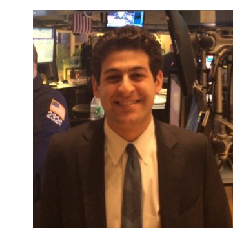

In [54]:
user_picture_pixels = obtain_image_pixels(user_picture_image_path)

plot_face(user_picture_pixels, is_array = True)

user_faces = get_all_faces(user_picture_pixels)

resized_faces = get_all_resized_faces(user_picture, dimensions = (160,160), margin = 10)

predictions = []

for i in resized_faces:
    predictions.append(make_a_prediction(i))

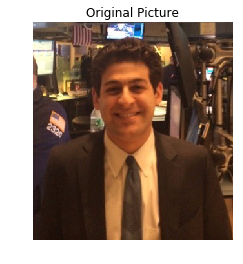

There were 1 faces found in this image. 

Predictions found for face #1: 



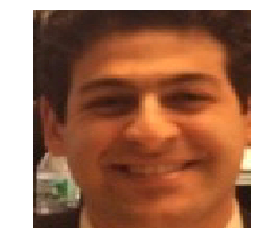

IndexError: invalid index to scalar variable.

In [55]:
plot_predictions(user_picture_image_path)

In [ ]:
photo_df.head()

In [ ]:
photo_df.info()

In [ ]:
photo_df.embeddings_fn[500]